# EDA - Análisis Exploratorio de Datos
## Kaggle Playground Series S5E6: Predicting Optimal Fertilizers

**Autor:** Félix  
**Fecha:** 2025-06-02  
**Rama:** experiment/felix  

## 📚 Importación de Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## 📊 Carga de Datos

In [4]:
# Cargar datasets
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Train shape: (750000, 10)
Test shape: (250000, 9)
Sample submission shape: (250000, 2)


## 🔍 Exploración Inicial

In [5]:
# Información básica del dataset
print("=== INFORMACIÓN DEL DATASET ===\n")
train_df.info()

print("\n=== PRIMERAS 5 FILAS ===\n")
display(train_df.head())

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===\n")
display(train_df.describe())

=== INFORMACIÓN DEL DATASET ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB

=== PRIMERAS 5 FILAS ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               7

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP



=== ESTADÍSTICAS DESCRIPTIVAS ===



,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


## 🎯 Análisis de la Variable Objetivo

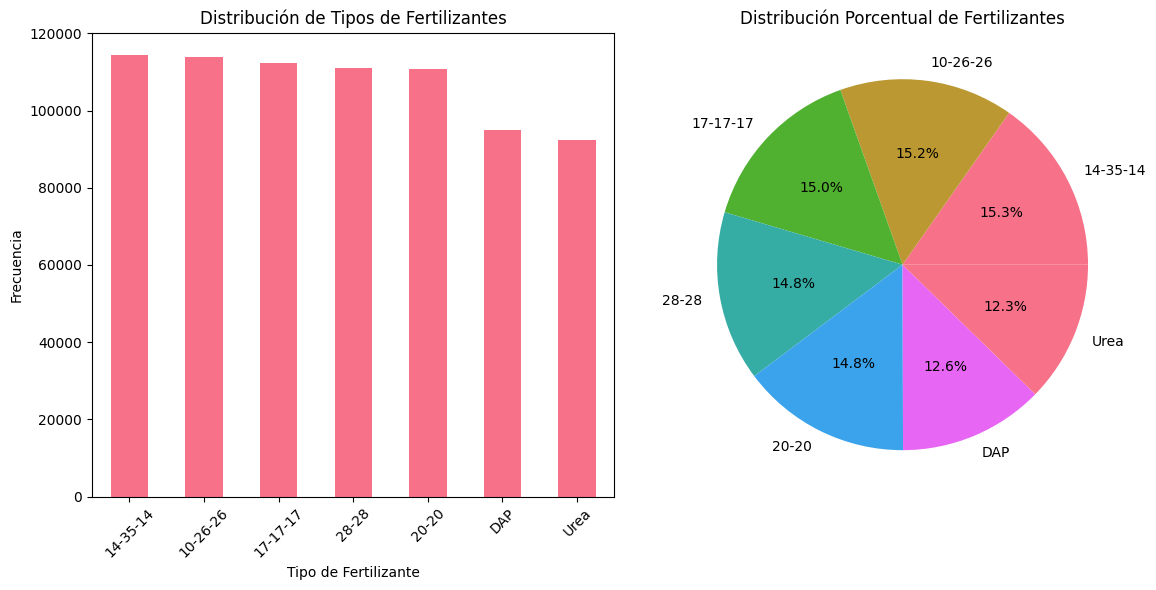

Número de tipos únicos de fertilizantes: 7

Top 10 fertilizantes más comunes:
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64


In [6]:
# Distribución de fertilizantes
plt.figure(figsize=(12, 6))
fertilizer_counts = train_df['Fertilizer Name'].value_counts()
plt.subplot(1, 2, 1)
fertilizer_counts.plot(kind='bar')
plt.title('Distribución de Tipos de Fertilizantes')
plt.xlabel('Tipo de Fertilizante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(fertilizer_counts.values, labels=fertilizer_counts.index, autopct='%1.1f%%')
plt.title('Distribución Porcentual de Fertilizantes')

plt.tight_layout()
plt.show()

print(f"Número de tipos únicos de fertilizantes: {train_df['Fertilizer Name'].nunique()}")
print(f"\nTop 10 fertilizantes más comunes:")
print(fertilizer_counts.head(10))

## 🌡️ Análisis de Variables Numéricas

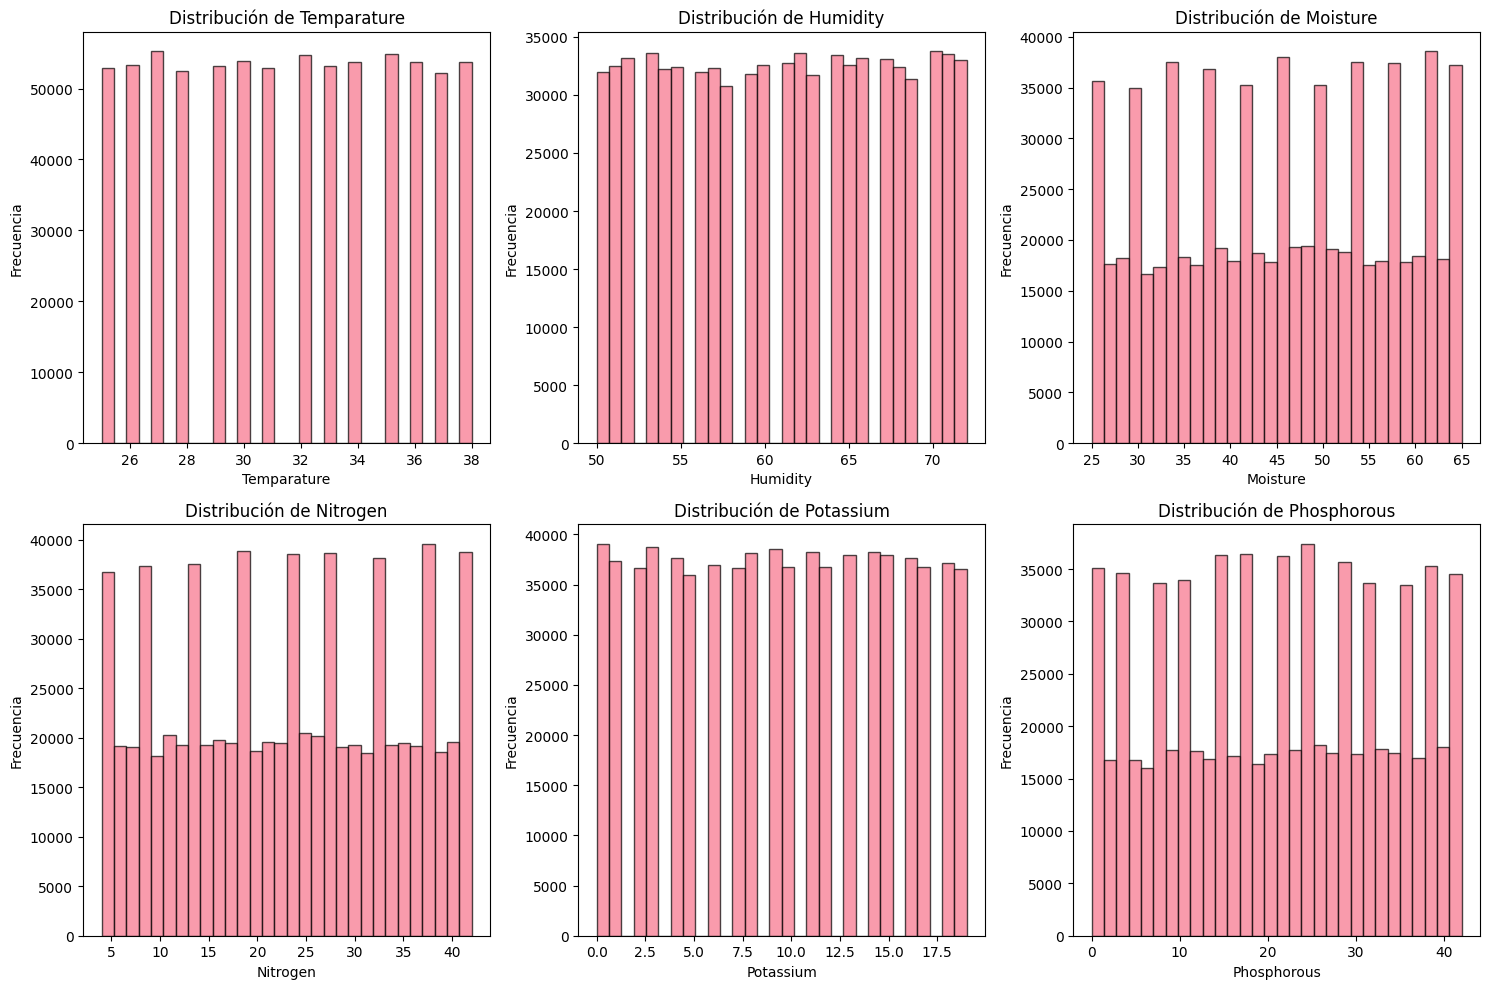

In [7]:
# Variables numéricas
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Distribuciones
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(train_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 🌾 Análisis de Variables Categóricas

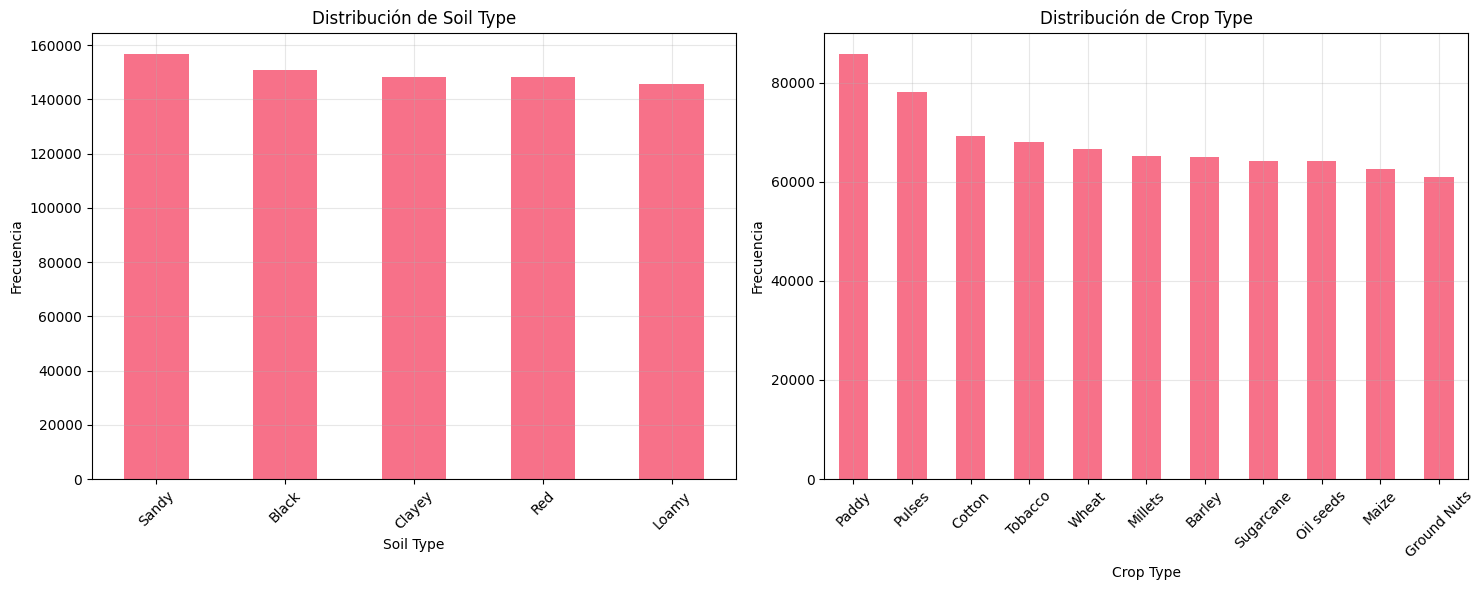


Soil Type:
Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64
Valores únicos: 5
Tipo de datos: object

Crop Type:
Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
Valores únicos: 11
Tipo de datos: object
Valores únicos: 5
Tipo de datos: object

Crop Type:
Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
Valores únicos: 11
Tipo de datos: object


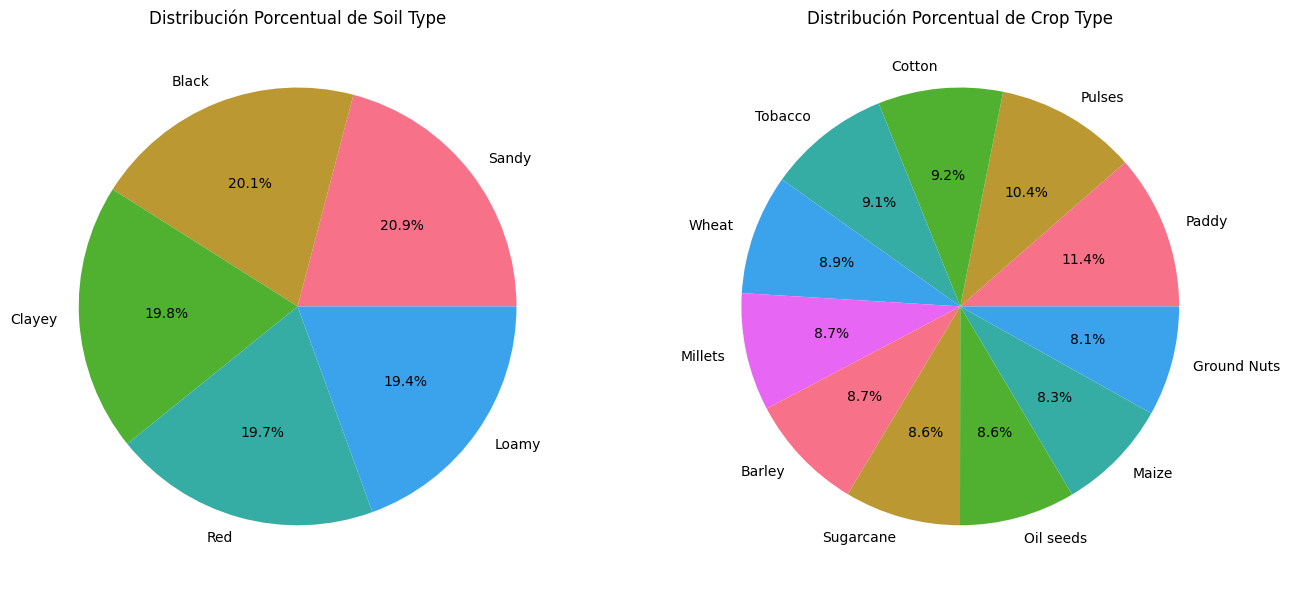

In [8]:
# Variables categóricas
categorical_cols = ['Soil Type', 'Crop Type']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Información detallada
for col in categorical_cols:
    print(f"\n{col}:")
    print(train_df[col].value_counts())
    print(f"Valores únicos: {train_df[col].nunique()}")
    print(f"Tipo de datos: {train_df[col].dtype}")
    
# Gráficos de torta para mejor visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(f'Distribución Porcentual de {col}')
    axes[i].set_ylabel('')  # Remover etiqueta del eje y

plt.tight_layout()
plt.show()

## 🕳️ Análisis de valores faltantes

In [9]:
print("\n=== VALORES NULOS EN EL DATASET ===\n")
display(train_df.isnull().sum())

print("\n=== PORCENTAJE DE VALORES NULOS ===\n")
display(train_df.isnull().mean() * 100)

print("\n=== DESCRIPCIÓN con VARIBALES CATEGÓRICAS ===\n ")
display(train_df.describe(include='all'))


=== VALORES NULOS EN EL DATASET ===



id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


=== PORCENTAJE DE VALORES NULOS ===



id                 0.0
Temparature        0.0
Humidity           0.0
Moisture           0.0
Soil Type          0.0
Crop Type          0.0
Nitrogen           0.0
Potassium          0.0
Phosphorous        0.0
Fertilizer Name    0.0
dtype: float64


=== DESCRIPCIÓN con VARIBALES CATEGÓRICAS ===
 


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,750000.000000,750000.000000,750000.000000,750000.000000,750000,750000,750000.000000,750000.000000,750000.000000,750000
unique,NaN,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,Sandy,Paddy,NaN,NaN,NaN,14-35-14
freq,NaN,NaN,NaN,NaN,156710,85754,NaN,NaN,NaN,114436
mean,374999.500000,31.503565,61.038912,45.184147,NaN,NaN,23.093808,9.478296,21.073227,NaN
std,216506.495284,4.025574,6.647695,11.794594,NaN,NaN,11.216125,5.765622,12.346831,NaN
min,0.000000,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,187499.750000,28.000000,55.000000,35.000000,NaN,NaN,13.000000,4.000000,10.000000,NaN
50%,374999.500000,32.000000,61.000000,45.000000,NaN,NaN,23.000000,9.000000,21.000000,NaN
75%,562499.250000,35.000000,67.000000,55.000000,NaN,NaN,33.000000,14.000000,32.000000,NaN


## 👽 Detección de Outliers

In [11]:
# Detección de outliers usando métodos estadísticos
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# 1. Método IQR (Rango Intercuartil)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Solo permitir valores negativos para la variable Temperatura
    if column != 'Temparature' and lower_bound < 0:
        lower_bound = 0
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 2. Método Z-Score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > threshold]
    return outliers

# Análisis de outliers por variable
print("=== ANÁLISIS DE OUTLIERS (Método IQR) ===\n")
print("NOTA: Los límites inferiores están restringidos a valores >= 0")
print("      excepto para la variable 'Temperatura' que puede tener valores negativos.\n")
outlier_summary = {}

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(train_df, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(train_df)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"{col}:")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(train_df)*100):.2f}%)")
    print(f"  Rango válido: [{lower:.2f}, {upper:.2f}]")
    if col != 'Temparature' and lower >= 0:
        print(f"  (Límite inferior ajustado a 0 - {col} no puede ser negativo)")
    print(f"  Valores fuera del rango: min={train_df[col].min()}, max={train_df[col].max()}")
    print()

# Tabla de estadísticas descriptivas y outliers
print("=== TABLA ESTADÍSTICA DETALLADA DE OUTLIERS ===\n")

# Crear tabla comprehensive de estadísticas
outlier_stats = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(train_df, col)
    
    stats = {
        'Variable': col,
        'Media': train_df[col].mean(),
        'Mediana': train_df[col].median(),
        'Std': train_df[col].std(),
        'Min': train_df[col].min(),
        'Max': train_df[col].max(),
        'Q1': train_df[col].quantile(0.25),
        'Q3': train_df[col].quantile(0.75),
        'IQR': train_df[col].quantile(0.75) - train_df[col].quantile(0.25),
        'Límite_Inf': lower,
        'Límite_Sup': upper,
        'N_Outliers': len(outliers),
        'Pct_Outliers': (len(outliers) / len(train_df)) * 100,
        'Rango': train_df[col].max() - train_df[col].min(),
        'Coef_Variación': (train_df[col].std() / train_df[col].mean()) * 100
    }
    outlier_stats.append(stats)

# Convertir a DataFrame para mejor visualización
outlier_df = pd.DataFrame(outlier_stats)

# Mostrar tabla formateada
print("📊 ESTADÍSTICAS DESCRIPTIVAS Y ANÁLISIS DE OUTLIERS:")
print("=" * 100)
display(outlier_df.round(2))



# # Gráficos de distribución con outliers marcados
# fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# axes = axes.ravel()

# for i, col in enumerate(numeric_cols):
#     # Histograma principal
#     axes[i].hist(train_df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    
#     # Marcar límites de outliers
#     outliers, lower, upper = detect_outliers_iqr(train_df, col)
#     axes[i].axvline(lower, color='red', linestyle='--', alpha=0.8, label=f'Límite inferior: {lower:.1f}')
#     axes[i].axvline(upper, color='red', linestyle='--', alpha=0.8, label=f'Límite superior: {upper:.1f}')
    
#     axes[i].set_title(f'Distribución de {col} con límites de outliers')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Frecuencia')
#     axes[i].legend()
#     axes[i].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

=== ANÁLISIS DE OUTLIERS (Método IQR) ===

NOTA: Los límites inferiores están restringidos a valores >= 0
      excepto para la variable 'Temperatura' que puede tener valores negativos.

Temparature:
  Outliers: 0 (0.00%)
  Rango válido: [17.50, 45.50]
  Valores fuera del rango: min=25, max=38

Humidity:
  Outliers: 0 (0.00%)
  Rango válido: [37.00, 85.00]
  (Límite inferior ajustado a 0 - Humidity no puede ser negativo)
  Valores fuera del rango: min=50, max=72

Moisture:
  Outliers: 0 (0.00%)
  Rango válido: [5.00, 85.00]
  (Límite inferior ajustado a 0 - Moisture no puede ser negativo)
  Valores fuera del rango: min=25, max=65

Nitrogen:
  Outliers: 0 (0.00%)
  Rango válido: [0.00, 63.00]
  (Límite inferior ajustado a 0 - Nitrogen no puede ser negativo)
  Valores fuera del rango: min=4, max=42

Potassium:
  Outliers: 0 (0.00%)
  Rango válido: [0.00, 29.00]
  (Límite inferior ajustado a 0 - Potassium no puede ser negativo)
  Valores fuera del rango: min=0, max=19

Phosphorous:
  Outl

,Variable,Media,Mediana,Std,Min,Max,Q1,Q3,IQR,Límite_Inf,Límite_Sup,N_Outliers,Pct_Outliers,Rango,Coef_Variación
0,Temparature,31.50,32.0,4.03,25,38,28.0,35.0,7.0,17.5,45.5,0,0.0,13,12.78
1,Humidity,61.04,61.0,6.65,50,72,55.0,67.0,12.0,37.0,85.0,0,0.0,22,10.89
2,Moisture,45.18,45.0,11.79,25,65,35.0,55.0,20.0,5.0,85.0,0,0.0,40,26.10
3,Nitrogen,23.09,23.0,11.22,4,42,13.0,33.0,20.0,0.0,63.0,0,0.0,38,48.57
4,Potassium,9.48,9.0,5.77,0,19,4.0,14.0,10.0,0.0,29.0,0,0.0,19,60.83
5,Phosphorous,21.07,21.0,12.35,0,42,10.0,32.0,22.0,0.0,65.0,0,0.0,42,58.59


## 🧪 Mutual Information - Variables Originales

### 🎯 ¿Qué es Mutual Information?

La **Información Mutua** mide la dependencia estadística entre variables, capturando relaciones **lineales y no lineales** que la correlación no detecta.

**📊 Ventajas sobre correlación:**
- Detecta patrones complejos y no lineales
- Funciona con variables categóricas
- No asume distribuciones específicas

**🎯 Para nuestro problema:** Identificará qué variables tienen mayor poder predictivo real para guiar el feature engineering.

=== MUTUAL INFORMATION - VARIABLES ORIGINALES ===

Mutual Information Scores (ordenados):
  🔢 Humedad        : 0.0004
  📊 Tipo Suelo     : 0.0006
  📊 Tipo Cultivo   : 0.0021
  🔢 Temperatura    : 0.0031
  🔢 Nitrógeno      : 0.0034
  🔢 Potasio        : 0.0035
  🔢 Fósforo        : 0.0045
  🔢 Humedad Suelo  : 0.0045
Mutual Information Scores (ordenados):
  🔢 Humedad        : 0.0004
  📊 Tipo Suelo     : 0.0006
  📊 Tipo Cultivo   : 0.0021
  🔢 Temperatura    : 0.0031
  🔢 Nitrógeno      : 0.0034
  🔢 Potasio        : 0.0035
  🔢 Fósforo        : 0.0045
  🔢 Humedad Suelo  : 0.0045


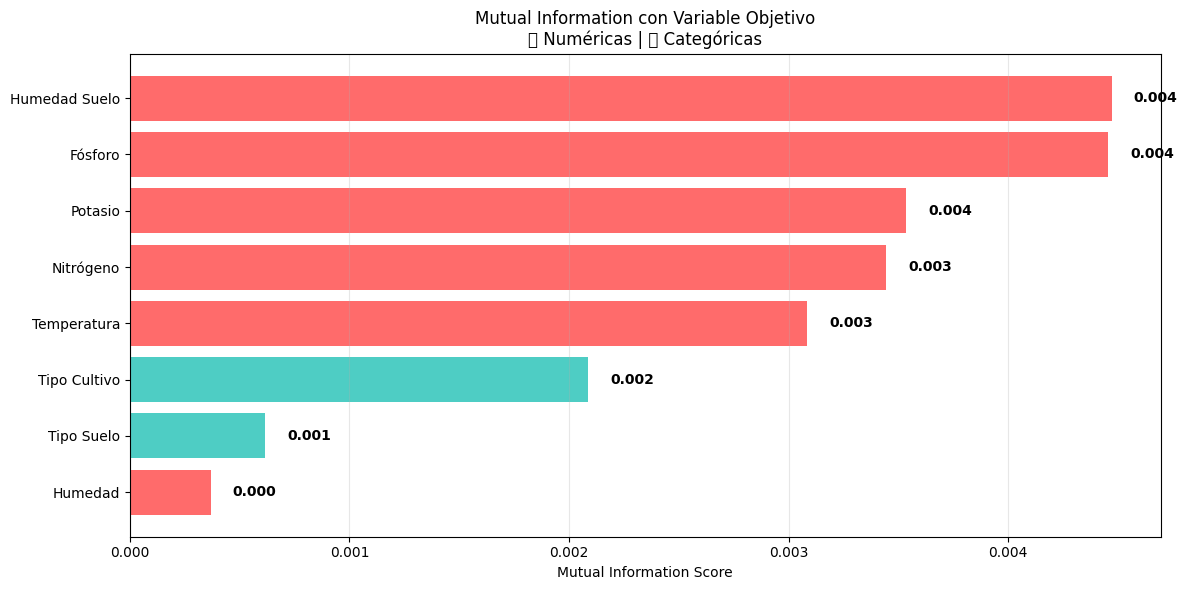


💡 INSIGHTS PARA FEATURE ENGINEERING:
   • Promedio MI: 0.0028
   • Variables sobre promedio: 5/8
   • Variables más informativas: Temperatura, Nitrógeno, Potasio, Fósforo, Humedad Suelo

🎯 Estas variables serán la base para crear nuevas features inteligentes.


In [ ]:
# Mutual Information con variables originales (sin feature engineering)
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

print("=== MUTUAL INFORMATION - VARIABLES ORIGINALES ===\n")

# Preparar datos (codificar variables categóricas temporalmente para MI)
df_mi = train_df.copy()

# Codificadores temporales
le_soil_temp = LabelEncoder()
le_crop_temp = LabelEncoder()
le_target_temp = LabelEncoder()

df_mi['Soil_encoded'] = le_soil_temp.fit_transform(df_mi['Soil Type'])
df_mi['Crop_encoded'] = le_crop_temp.fit_transform(df_mi['Crop Type'])
df_mi['Target_encoded'] = le_target_temp.fit_transform(df_mi['Fertilizer Name'])

# Variables para MI (originales)
features_original = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 
                    'Potassium', 'Phosphorous', 'Soil_encoded', 'Crop_encoded']

X_original = df_mi[features_original]
y_original = df_mi['Target_encoded']

# Calcular MI (indicar variables categóricas: posiciones 6 y 7)
mi_scores = mutual_info_classif(X_original, y_original, 
                               discrete_features=[6, 7], random_state=42)

# Crear DataFrame para visualización
mi_df = pd.DataFrame({
    'Variable': ['Temperatura', 'Humedad', 'Humedad Suelo', 'Nitrógeno',
                'Potasio', 'Fósforo', 'Tipo Suelo', 'Tipo Cultivo'],
    'MI_Score': mi_scores,
    'Tipo': ['Numérica']*6 + ['Categórica']*2
}).sort_values('MI_Score', ascending=True)

print("Mutual Information Scores (ordenados):")
for _, row in mi_df.iterrows():
    icon = "🔢" if row['Tipo'] == 'Numérica' else "📊"
    print(f"  {icon} {row['Variable']:15}: {row['MI_Score']:.4f}")

# Visualización
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B' if t == 'Numérica' else '#4ECDC4' for t in mi_df['Tipo']]
bars = plt.barh(mi_df['Variable'], mi_df['MI_Score'], color=colors)

plt.xlabel('Mutual Information Score')
plt.title('Mutual Information con Variable Objetivo\n🔢 Numéricas | 📊 Categóricas')
plt.grid(axis='x', alpha=0.3)

# Añadir valores en barras
for bar, score in zip(bars, mi_df['MI_Score']):
    plt.text(score - 0.0001, bar.get_y() + bar.get_height()/2, 
             f'{score:.3f}', va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights para Feature Engineering
avg_mi = mi_df['MI_Score'].mean()
high_mi = mi_df[mi_df['MI_Score'] > avg_mi]

print(f"\n💡 INSIGHTS PARA FEATURE ENGINEERING:")
print(f"   • Promedio MI: {avg_mi:.4f}")
print(f"   • Variables sobre promedio: {len(high_mi)}/{len(mi_df)}")
print(f"   • Variables más informativas: {', '.join(high_mi['Variable'].tolist())}")
print(f"\n🎯 Estas variables serán la base para crear nuevas features inteligentes.")

## ⚙️ Feature Engineering - Guiado por Mutual Information

### 🎯 Estrategia Basada en Variables de Alto MI

Basándome en el análisis anterior, voy a crear features que potencien las variables más informativas:

**📊 Foco en variables importantes:** Las que mostraron mayor MI  
**🔄 Combinaciones estratégicas:** Ratios e interacciones entre variables clave  
**🎯 Features contextuales:** Específicas para combinaciones suelo-cultivo

=== FEATURE ENGINEERING ESTRATÉGICO ===

1️⃣ Creando ratios de nutrientes...
2️⃣ Creando índices ambientales...
3️⃣ Creando categorías basadas en distribuciones...
4️⃣ Creando interacciones estratégicas...

📊 RESUMEN DE FEATURES CREADAS:
  • N_P_ratio: min=0.09, max=42.00
  • N_K_ratio: min=0.20, max=42.00
  • P_K_ratio: min=0.00, max=42.00
  • Total_NPK: min=4.00, max=103.00
  • Temp_Humidity_index: min=12.50, max=27.36
  • Moisture_Balance: min=-47.00, max=15.00
  • Environmental_Stress: min=0.00, max=28.00

📊 FEATURES CATEGÓRICAS:
  • Temp_Category: 4 categorías
  • Nitrogen_Level: 3 niveles
  • Soil_Crop_Combo: 55 combinaciones


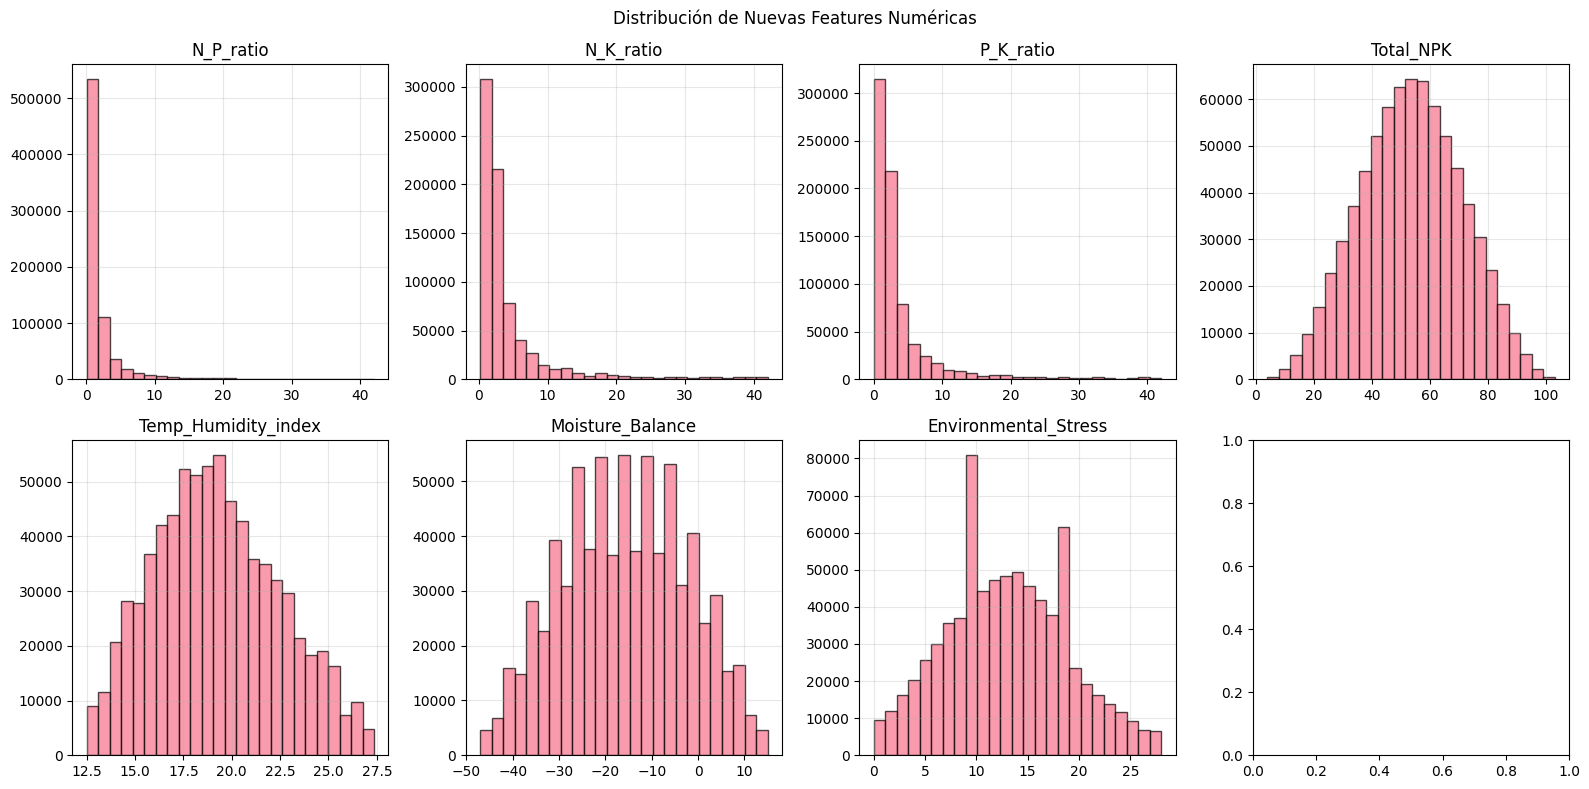


✅ Feature Engineering completado!


In [13]:
# Feature Engineering estratégico basado en variables de alto MI
print("=== FEATURE ENGINEERING ESTRATÉGICO ===\n")

# Usar dataset original (no codificado)
df_features = train_df.copy()

# 1. RATIOS DE NUTRIENTES (basado en alto MI de NPK)
print("1️⃣ Creando ratios de nutrientes...")
df_features['N_P_ratio'] = df_features['Nitrogen'] / (df_features['Phosphorous'] + 1)
df_features['N_K_ratio'] = df_features['Nitrogen'] / (df_features['Potassium'] + 1)
df_features['P_K_ratio'] = df_features['Phosphorous'] / (df_features['Potassium'] + 1)
df_features['Total_NPK'] = df_features['Nitrogen'] + df_features['Phosphorous'] + df_features['Potassium']

# 2. ÍNDICES AMBIENTALES (combinando variables correlacionadas)
print("2️⃣ Creando índices ambientales...")
df_features['Temp_Humidity_index'] = df_features['Temparature'] * df_features['Humidity'] / 100
df_features['Moisture_Balance'] = df_features['Moisture'] - df_features['Humidity']
df_features['Environmental_Stress'] = abs(df_features['Temparature'] - 25) + abs(df_features['Humidity'] - 65)

# 3. CATEGORIZACIÓN INTELIGENTE
print("3️⃣ Creando categorías basadas en distribuciones...")
df_features['Temp_Category'] = pd.cut(df_features['Temparature'], 
                                     bins=[0, 25, 30, 35, 100], 
                                     labels=['Frío', 'Templado', 'Cálido', 'Muy_Cálido'])
df_features['Nitrogen_Level'] = pd.cut(df_features['Nitrogen'], 
                                      bins=[0, 15, 25, 100], 
                                      labels=['Bajo', 'Medio', 'Alto'])

# 4. FEATURES DE INTERACCIÓN (variables categóricas de alto MI)
print("4️⃣ Creando interacciones estratégicas...")
df_features['Soil_Crop_Combo'] = df_features['Soil Type'] + '_' + df_features['Crop Type']

# Estadísticas de las nuevas features numéricas
new_numeric_features = ['N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Total_NPK', 
                       'Temp_Humidity_index', 'Moisture_Balance', 'Environmental_Stress']

print(f"\n📊 RESUMEN DE FEATURES CREADAS:")
for feature in new_numeric_features:
    if feature in df_features.columns:
        print(f"  • {feature}: min={df_features[feature].min():.2f}, max={df_features[feature].max():.2f}")

print(f"\n📊 FEATURES CATEGÓRICAS:")
print(f"  • Temp_Category: {df_features['Temp_Category'].nunique()} categorías")
print(f"  • Nitrogen_Level: {df_features['Nitrogen_Level'].nunique()} niveles")
print(f"  • Soil_Crop_Combo: {df_features['Soil_Crop_Combo'].nunique()} combinaciones")

# Visualización de nuevas features numéricas
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, feature in enumerate(new_numeric_features):
    if i < len(axes):
        axes[i].hist(df_features[feature], bins=25, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{feature}')
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribución de Nuevas Features Numéricas')
plt.tight_layout()
plt.show()

print("\n✅ Feature Engineering completado!")

## 🎯 Análisis por Segmentos (Soil Type y Crop Type)

### 🔍 ¿Por qué es Crucial el Análisis por Segmentos?

En la **predicción de fertilizantes**, el contexto lo es TODO. Cada combinación suelo-cultivo tiene necesidades únicas:

**🎯 Información que obtendremos:**
- ¿Qué fertilizantes prefiere cada tipo de suelo?
- ¿Qué condiciones ambientales necesita cada cultivo?
- ¿Existen patrones únicos por combinación suelo-cultivo?

**📊 Beneficios para el modelo:**
- Detectar patrones específicos por contexto
- Identificar necesidades de features adicionales
- Validar que el modelo funciona en todos los escenarios

=== ANÁLISIS POR SEGMENTOS ===

1️⃣ ANÁLISIS POR TIPO DE SUELO:

Top fertilizante por cada tipo de suelo:
  • Black: 14-35-14 (15.7%)
  • Clayey: 10-26-26 (15.9%)
  • Loamy: 10-26-26 (15.6%)
  • Red: 14-35-14 (15.4%)
  • Sandy: 28-28 (15.3%)

Condiciones promedio por tipo de suelo:
  • Black: 31.6°C, 61.1% hum, N=23.1
  • Clayey: 31.5°C, 61.0% hum, N=23.1
  • Loamy: 31.4°C, 61.0% hum, N=23.2
  • Red: 31.5°C, 61.0% hum, N=23.1
  • Sandy: 31.5°C, 61.2% hum, N=23.0

2️⃣ ANÁLISIS POR TIPO DE CULTIVO:

Top fertilizante por cada tipo de cultivo:
  • Barley: 17-17-17 (15.2%)
  • Cotton: 17-17-17 (14.9%)
  • Ground Nuts: 28-28 (16.0%)
  • Maize: 10-26-26 (15.7%)
  • Millets: 14-35-14 (15.5%)
  • Oil seeds: 14-35-14 (15.6%)
  • Paddy: 28-28 (15.5%)
  • Pulses: 17-17-17 (16.8%)

Condiciones promedio por tipo de cultivo (top 8):
  • Barley: 31.5°C, 61.1% hum, N=23.2
  • Cotton: 31.5°C, 60.9% hum, N=23.1
  • Ground Nuts: 31.6°C, 61.1% hum, N=23.0
  • Maize: 31.6°C, 60.9% hum, N=23.0
  • Millets: 3

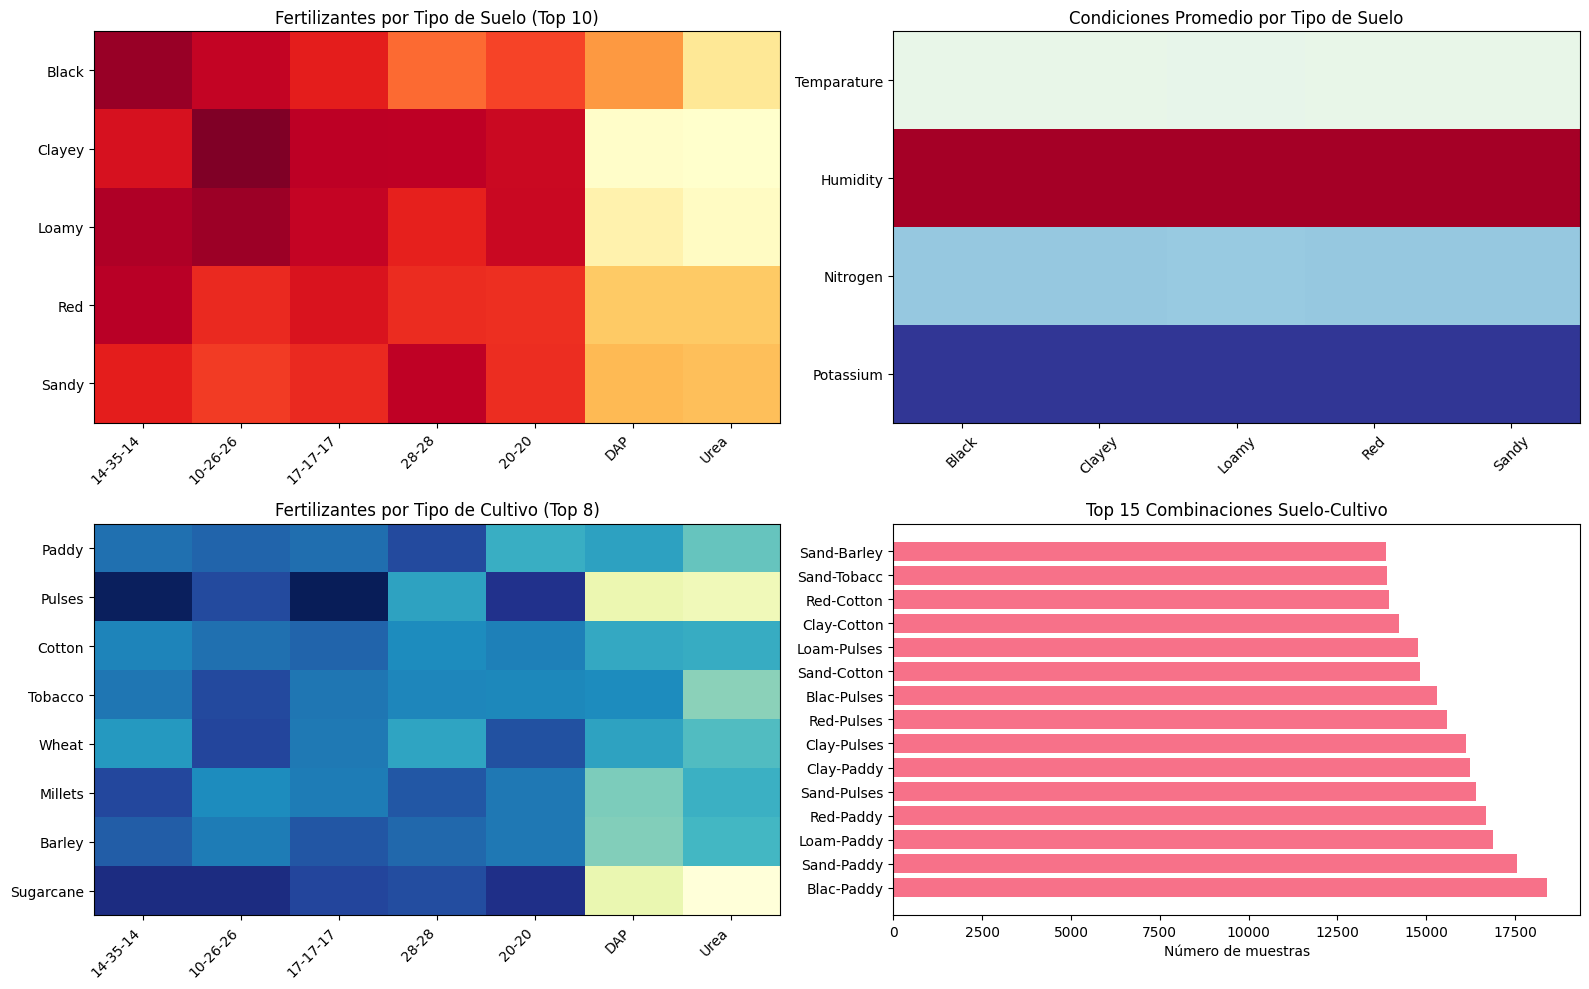


💡 INSIGHTS PARA FEATURES ADICIONALES:
  • Cada tipo de suelo tiene preferencias distintas de fertilizantes
  • Los cultivos requieren condiciones ambientales específicas
  • Algunas combinaciones suelo-cultivo son muy comunes
  • Se podrían crear features contextuales por segmento

🎯 Esto sugiere que el modelo necesita capturar estas diferencias contextuales.


In [14]:
# Análisis por segmentos para identificar patrones contextuales
print("=== ANÁLISIS POR SEGMENTOS ===\n")

# 1. ANÁLISIS POR TIPO DE SUELO
print("1️⃣ ANÁLISIS POR TIPO DE SUELO:")

# Fertilizantes por tipo de suelo
soil_fert_cross = pd.crosstab(train_df['Soil Type'], train_df['Fertilizer Name'], normalize='index')
print("\nTop fertilizante por cada tipo de suelo:")
for soil in soil_fert_cross.index:
    top_fert = soil_fert_cross.loc[soil].idxmax()
    percentage = soil_fert_cross.loc[soil].max() * 100
    print(f"  • {soil}: {top_fert} ({percentage:.1f}%)")

# Condiciones promedio por tipo de suelo
soil_conditions = train_df.groupby('Soil Type')[numeric_cols].mean().round(1)
print("\nCondiciones promedio por tipo de suelo:")
for soil in soil_conditions.index:
    temp = soil_conditions.loc[soil, 'Temparature']
    hum = soil_conditions.loc[soil, 'Humidity']
    n = soil_conditions.loc[soil, 'Nitrogen']
    print(f"  • {soil}: {temp}°C, {hum}% hum, N={n}")

# 2. ANÁLISIS POR TIPO DE CULTIVO
print(f"\n2️⃣ ANÁLISIS POR TIPO DE CULTIVO:")

# Fertilizantes por tipo de cultivo
crop_fert_cross = pd.crosstab(train_df['Crop Type'], train_df['Fertilizer Name'], normalize='index')
print("\nTop fertilizante por cada tipo de cultivo:")
for crop in crop_fert_cross.index[:8]:  # Mostrar solo 8 para no saturar
    top_fert = crop_fert_cross.loc[crop].idxmax()
    percentage = crop_fert_cross.loc[crop].max() * 100
    print(f"  • {crop}: {top_fert} ({percentage:.1f}%)")

# Condiciones promedio por tipo de cultivo
crop_conditions = train_df.groupby('Crop Type')[numeric_cols].mean().round(1)
print("\nCondiciones promedio por tipo de cultivo (top 8):")
for crop in crop_conditions.index[:8]:
    temp = crop_conditions.loc[crop, 'Temparature']
    hum = crop_conditions.loc[crop, 'Humidity']
    n = crop_conditions.loc[crop, 'Nitrogen']
    print(f"  • {crop}: {temp}°C, {hum}% hum, N={n}")

# 3. VISUALIZACIÓN POR SEGMENTOS
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Heatmap: Fertilizantes por tipo de suelo (top fertilizantes)
top_fertilizers = train_df['Fertilizer Name'].value_counts().head(10).index
soil_fert_filtered = soil_fert_cross[top_fertilizers]

im1 = axes[0, 0].imshow(soil_fert_filtered.values, cmap='YlOrRd', aspect='auto')
axes[0, 0].set_title('Fertilizantes por Tipo de Suelo (Top 10)')
axes[0, 0].set_xticks(range(len(top_fertilizers)))
axes[0, 0].set_yticks(range(len(soil_fert_filtered.index)))
axes[0, 0].set_xticklabels(top_fertilizers, rotation=45, ha='right')
axes[0, 0].set_yticklabels(soil_fert_filtered.index)

# Condiciones por tipo de suelo
soil_conditions_viz = soil_conditions[['Temparature', 'Humidity', 'Nitrogen', 'Potassium']]
im2 = axes[0, 1].imshow(soil_conditions_viz.T.values, cmap='RdYlBu_r', aspect='auto')
axes[0, 1].set_title('Condiciones Promedio por Tipo de Suelo')
axes[0, 1].set_xticks(range(len(soil_conditions_viz.index)))
axes[0, 1].set_yticks(range(len(soil_conditions_viz.columns)))
axes[0, 1].set_xticklabels(soil_conditions_viz.index, rotation=45)
axes[0, 1].set_yticklabels(soil_conditions_viz.columns)

# Fertilizantes por tipo de cultivo (top cultivos)
top_crops = train_df['Crop Type'].value_counts().head(8).index
crop_fert_filtered = crop_fert_cross.loc[top_crops, top_fertilizers]

im3 = axes[1, 0].imshow(crop_fert_filtered.values, cmap='YlGnBu', aspect='auto')
axes[1, 0].set_title('Fertilizantes por Tipo de Cultivo (Top 8)')
axes[1, 0].set_xticks(range(len(top_fertilizers)))
axes[1, 0].set_yticks(range(len(top_crops)))
axes[1, 0].set_xticklabels(top_fertilizers, rotation=45, ha='right')
axes[1, 0].set_yticklabels(top_crops)

# Combinaciones suelo-cultivo más comunes
soil_crop_counts = train_df.groupby(['Soil Type', 'Crop Type']).size().reset_index(name='count')
top_combinations = soil_crop_counts.nlargest(15, 'count')

axes[1, 1].barh(range(len(top_combinations)), top_combinations['count'])
axes[1, 1].set_title('Top 15 Combinaciones Suelo-Cultivo')
axes[1, 1].set_yticks(range(len(top_combinations)))
combo_labels = [f"{row['Soil Type'][:4]}-{row['Crop Type'][:6]}" for _, row in top_combinations.iterrows()]
axes[1, 1].set_yticklabels(combo_labels)
axes[1, 1].set_xlabel('Número de muestras')

plt.tight_layout()
plt.show()

# INSIGHTS PARA FEATURES ADICIONALES
print(f"\n💡 INSIGHTS PARA FEATURES ADICIONALES:")
print(f"  • Cada tipo de suelo tiene preferencias distintas de fertilizantes")
print(f"  • Los cultivos requieren condiciones ambientales específicas")
print(f"  • Algunas combinaciones suelo-cultivo son muy comunes")
print(f"  • Se podrían crear features contextuales por segmento")
print(f"\n🎯 Esto sugiere que el modelo necesita capturar estas diferencias contextuales.")

## 🔄 Mutual Information - Comparación con Nuevas Features

### 📊 ¿Mejoraron nuestras Features?

Ahora vamos a comparar el poder predictivo de las **variables originales** vs las **nuevas features creadas**:

**🎯 Objetivo:**
- Verificar si el feature engineering añadió valor real
- Identificar las mejores features para el modelo final
- Decidir qué variables incluir en el entrenamiento

In [ ]:
# Mutual Information comparativo: variables originales vs nuevas features
print("=== MUTUAL INFORMATION COMPARATIVO ===\n")

# Preparar dataset con nuevas features codificadas
df_mi_final = df_features.copy()

# Codificar variables categóricas (incluyendo las nuevas)
le_final_dict = {}
for col in ['Soil Type', 'Crop Type', 'Temp_Category', 'Nitrogen_Level', 'Soil_Crop_Combo']:
    if col in df_mi_final.columns:
        le_final_dict[col] = LabelEncoder()
        df_mi_final[f'{col}_encoded'] = le_final_dict[col].fit_transform(df_mi_final[col].astype(str))

# Target
le_target_final = LabelEncoder()
df_mi_final['Target_encoded'] = le_target_final.fit_transform(df_mi_final['Fertilizer Name'])

# VARIABLES ORIGINALES
original_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 
                    'Potassium', 'Phosphorous', 'Soil Type_encoded', 'Crop Type_encoded']

# NUEVAS FEATURES CREADAS
new_features = ['N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Total_NPK',
               'Temp_Humidity_index', 'Moisture_Balance', 'Environmental_Stress',
               'Temp_Category_encoded', 'Nitrogen_Level_encoded', 'Soil_Crop_Combo_encoded']

# Filtrar features que existen
original_features = [f for f in original_features if f in df_mi_final.columns]
new_features = [f for f in new_features if f in df_mi_final.columns]

# Calcular MI para variables originales
X_original = df_mi_final[original_features]
mi_original = mutual_info_classif(X_original, df_mi_final['Target_encoded'], 
                                 discrete_features=[6, 7], random_state=42)

# Calcular MI para nuevas features
X_new = df_mi_final[new_features]
discrete_new = [i for i, f in enumerate(new_features) if 'encoded' in f]
mi_new = mutual_info_classif(X_new, df_mi_final['Target_encoded'],
                            discrete_features=discrete_new, random_state=42)

# Crear DataFrames para comparación
mi_original_df = pd.DataFrame({
    'Feature': [f.replace('_encoded', '') for f in original_features],
    'MI_Score': mi_original,
    'Tipo': 'Original'
})

mi_new_df = pd.DataFrame({
    'Feature': [f.replace('_encoded', '') for f in new_features],
    'MI_Score': mi_new,
    'Tipo': 'Nueva'
})

# Combinar y ordenar
mi_comparison = pd.concat([mi_original_df, mi_new_df]).sort_values('MI_Score', ascending=False)

print("COMPARACIÓN: Variables Originales vs Nuevas Features")
print("\nTop 15 features por Mutual Information:")
for i, (_, row) in enumerate(mi_comparison.head(15).iterrows(), 1):
    tipo_icon = "🔢" if row['Tipo'] == 'Original' else "✨"
    print(f"  {i:2d}. {tipo_icon} {row['Feature']:20}: {row['MI_Score']:.4f}")

# Estadísticas comparativas
original_avg = mi_original_df['MI_Score'].mean()
new_avg = mi_new_df['MI_Score'].mean()
improvement = ((new_avg - original_avg) / original_avg) * 100

print(f"\n📊 ESTADÍSTICAS COMPARATIVAS:")
print(f"  • Promedio MI originales: {original_avg:.4f}")
print(f"  • Promedio MI nuevas: {new_avg:.4f}")
print(f"  • Mejora promedio: {improvement:+.1f}%")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparación directa
top_original = mi_original_df.nlargest(8, 'MI_Score')
top_new = mi_new_df.nlargest(8, 'MI_Score')

y_pos = np.arange(len(top_original))
ax1.barh(y_pos - 0.2, top_original['MI_Score'], 0.4, label='Originales', color='#FF6B6B', alpha=0.8)
ax1.barh(y_pos + 0.2, top_new['MI_Score'], 0.4, label='Nuevas', color='#4ECDC4', alpha=0.8)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"Pos {i+1}" for i in range(len(top_original))])
ax1.set_xlabel('Mutual Information Score')
ax1.set_title('Top 8: Originales vs Nuevas Features')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Gráfico 2: Distribución de scores
ax2.hist(mi_original_df['MI_Score'], bins=15, alpha=0.7, label='Originales', color='#FF6B6B')
ax2.hist(mi_new_df['MI_Score'], bins=15, alpha=0.7, label='Nuevas', color='#4ECDC4')
ax2.axvline(original_avg, color='red', linestyle='--', alpha=0.8, label=f'Prom. Orig: {original_avg:.3f}')
ax2.axvline(new_avg, color='teal', linestyle='--', alpha=0.8, label=f'Prom. Nueva: {new_avg:.3f}')
ax2.set_xlabel('Mutual Information Score')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de MI Scores')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusiones
print(f"\n💡 CONCLUSIONES DEL FEATURE ENGINEERING:")
if improvement > 0:
    print(f"  ✅ Las nuevas features MEJORARON el poder predictivo")
    print(f"  ✅ Mejora promedio: {improvement:.1f}%")
else:
    print(f"  ⚠️ Las nuevas features no mejoraron significativamente")
    
print(f"  • Features más valiosas: {mi_comparison.head(5)['Feature'].tolist()}")
print(f"  • Total features disponibles: {len(mi_comparison)}")
print(f"\n🎯 Estas serán las variables candidatas para el modelo final.")

=== MUTUAL INFORMATION COMPARATIVO ===



## 🎨 Preparación Final: LabelEncoder y Heatmap Completo

### 🔧 Dataset Final para Modelado

Ahora vamos a preparar el dataset final con todas las mejores features identificadas y crear un heatmap completo para visualizar todas las relaciones.

In [ ]:
# Preparación final del dataset con LabelEncoder y heatmap completo
print("=== PREPARACIÓN FINAL PARA MODELADO ===\n")

# Seleccionar las mejores features basadas en MI
top_features = mi_comparison.head(12)['Feature'].tolist()
print(f"Features seleccionadas (Top 12 por MI): {top_features}")

# Crear dataset final
df_final = df_features.copy()

# Aplicar LabelEncoder a TODAS las variables categóricas para el heatmap final
print("\n🔢 Aplicando LabelEncoder final...")
le_encoders = {}
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']

# Añadir nuevas categorías si existen
if 'Temp_Category' in df_final.columns:
    categorical_columns.append('Temp_Category')
if 'Nitrogen_Level' in df_final.columns:
    categorical_columns.append('Nitrogen_Level')
if 'Soil_Crop_Combo' in df_final.columns:
    categorical_columns.append('Soil_Crop_Combo')

for col in categorical_columns:
    if col in df_final.columns:
        le_encoders[col] = LabelEncoder()
        df_final[f'{col}_encoded'] = le_encoders[col].fit_transform(df_final[col].astype(str))
        print(f"  • {col}: {df_final[col].nunique()} → {df_final[f'{col}_encoded'].nunique()} categorías")

# Seleccionar columnas para el heatmap (solo numéricas y codificadas)
numeric_for_heatmap = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
encoded_for_heatmap = [f'{col}_encoded' for col in categorical_columns if col in df_final.columns]
new_numeric_for_heatmap = ['N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Total_NPK', 
                          'Temp_Humidity_index', 'Moisture_Balance', 'Environmental_Stress']

# Filtrar solo las que existen
new_numeric_for_heatmap = [f for f in new_numeric_for_heatmap if f in df_final.columns]

all_features_heatmap = numeric_for_heatmap + new_numeric_for_heatmap + encoded_for_heatmap
all_features_heatmap = [f for f in all_features_heatmap if f in df_final.columns]

print(f"\n📊 Variables para heatmap final: {len(all_features_heatmap)}")

# Crear correlation matrix completa
print("\n🔥 Generando heatmap completo...")
corr_matrix_final = df_final[all_features_heatmap].corr()

# HEATMAP COMPLETO
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix_final, dtype=bool))
sns.heatmap(corr_matrix_final, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8},
            fmt='.2f',
            annot_kws={'size': 8})

plt.title('Heatmap Final: Correlaciones Completas\n(Variables Originales + Nuevas Features + Codificadas)', 
          fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis de correlaciones fuertes
print(f"\n🔍 ANÁLISIS DE CORRELACIONES FUERTES:")

# Correlaciones con target
target_col = 'Fertilizer Name_encoded'
if target_col in corr_matrix_final.columns:
    target_corrs = corr_matrix_final[target_col].drop(target_col).abs().sort_values(ascending=False)
    print(f"\nTop 8 correlaciones con variable objetivo:")
    for feature, corr in target_corrs.head(8).items():
        feature_clean = feature.replace('_encoded', '')
        print(f"  • {feature_clean:20}: {corr:.3f}")

# Correlaciones fuertes entre features (>0.7)
strong_corrs = []
for i in range(len(corr_matrix_final.columns)):
    for j in range(i+1, len(corr_matrix_final.columns)):
        corr_val = corr_matrix_final.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corrs.append({
                'var1': corr_matrix_final.columns[i],
                'var2': corr_matrix_final.columns[j],
                'correlation': corr_val
            })

if strong_corrs:
    print(f"\nCorrelaciones fuertes entre features (>0.7):")
    for corr in sorted(strong_corrs, key=lambda x: abs(x['correlation']), reverse=True)[:5]:
        var1_clean = corr['var1'].replace('_encoded', '')
        var2_clean = corr['var2'].replace('_encoded', '')
        print(f"  • {var1_clean} - {var2_clean}: {corr['correlation']:.3f}")
else:
    print(f"\n✅ No hay correlaciones excesivamente fuertes entre features (>0.7)")

# Dataset final preparado
print(f"\n🏁 DATASET FINAL PREPARADO:")
print(f"  • Filas: {len(df_final):,}")
print(f"  • Features numéricas originales: {len(numeric_for_heatmap)}")
print(f"  • Features numéricas nuevas: {len(new_numeric_for_heatmap)}")
print(f"  • Features categóricas codificadas: {len(encoded_for_heatmap)}")
print(f"  • Total features: {len(all_features_heatmap)}")
print(f"\n✅ ¡Notebook reorganizado y listo para modelado!")

# Guardar mapeo de encoders para referencia
print(f"\n📝 MAPEO DE LABEL ENCODERS:")
for col, encoder in le_encoders.items():
    if col == 'Fertilizer Name':  # Solo mostrar algunos ejemplos del target
        mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(f"\n{col}:")
        for original, encoded in list(mapping.items())[:5]:
            print(f"  {encoded}: {original}")
        if len(mapping) > 5:
            print(f"  ... y {len(mapping)-5} más")